# 3.2 - Pandas Deepdive

![pandas_deep](../../images/pandas_deep.jpg)

Antes de empezar con las técnicas de limpieza de datos y visualización vamos a ver como cargar los diferentes tipos de datos con los que podemos trabajar

### Tipos de archivos con los que podemos trabajar en pandas

    - CSV : 'Comma Separated Values' son archivos de texto plano con los valores separados por comas, si está correctamente codificado pandas interpretará como una tabla y cada una de las comas corresponderá a un dato de una columna, también pueden abrirse desde excel y este los intepretará como una tabla de la misma forma
    - xlsx & xls: 'Archivos de excel' importa los datos de un archivo de excel con la salvedad de que únicamente importa los datos de las filas y columnas, pero no las fórmulas que hayamos utilizado para obtenerlos.
    - json: JSON son las siglas de "JavaScript Object Notation". Un archivo JSON, tiene como extensión los .json, además los datos que contiene son representados en un par llave:valor, igualmente que un objeto JavaScript tradicional. Por simplificar un archivo json podemos interpretarlo como un diccionario de python.



**Para poder usar archivos de excel en python deberemos de instalar las siguientes librerías**

In [1]:
%pip install openpyxl
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Importamos las librerías necesarias**

In [2]:
import pandas as pd
import numpy as np

**Cargar un archivo .csv**

In [3]:
df_csv = pd.read_csv('../../../data/Marketing-Customer-Analysis.csv')

df_csv.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**Cargar un archivo .xlsx o .xls**

In [4]:
df_excel = pd.read_excel('../../../data/Online Retail.xlsx')

df_excel.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


**Cargar un archivo .json**

In [5]:
df_json = pd.read_json('../../../data/companies.json', orient='records', lines=True)

df_json.head()

,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,offices,milestones,video_embeds,screenshots,external_links,partners,deadpooled_month,deadpooled_day,deadpooled_url,ipo
0,{'$oid': '52cdef7c4bab8bd675297d8a'},Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,...,"[{'description': '', 'address1': '710 - 2nd Av...","[{'id': 5869, 'description': 'Wetpaint named i...",[],"[{'available_sizes': [[[150, 86], 'assets/imag...",[{'external_url': 'http://www.geekwire.com/201...,[],NaN,NaN,NaN,NaN
1,{'$oid': '52cdef7c4bab8bd675297d8b'},AdventNet,abc3,http://www.crunchbase.com/company/adventnet,http://adventnet.com,,,manageengine,enterprise,600.0,...,"[{'description': 'Headquarters', 'address1': '...",[],[],"[{'available_sizes': [[[150, 94], 'assets/imag...",[],[],NaN,NaN,NaN,NaN
2,{'$oid': '52cdef7c4bab8bd675297d8c'},Zoho,abc4,http://www.crunchbase.com/company/zoho,http://zoho.com,http://blogs.zoho.com/,http://blogs.zoho.com/feed,zoho,software,1600.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 388, 'description': 'Zoho Reaches 2 Mi...","[{'embed_code': '<object width=""430"" height=""2...",[],[{'external_url': 'http://www.online-tech-tips...,[],NaN,NaN,NaN,NaN
3,{'$oid': '52cdef7c4bab8bd675297d8d'},Digg,digg,http://www.crunchbase.com/company/digg,http://www.digg.com,http://blog.digg.com/,http://blog.digg.com/?feed=rss2,digg,news,60.0,...,"[{'description': None, 'address1': '135 Missis...","[{'id': 9588, 'description': 'Another Digg Exe...","[{'embed_code': '<embed src=""http://blip.tv/pl...","[{'available_sizes': [[[117, 150], 'assets/ima...",[{'external_url': 'http://www.sociableblog.com...,[],NaN,NaN,None,None
4,{'$oid': '52cdef7c4bab8bd675297d8e'},Facebook,facebook,http://www.crunchbase.com/company/facebook,http://facebook.com,http://blog.facebook.com,http://blog.facebook.com/atom.php,facebook,social,5299.0,...,"[{'description': 'Headquarters', 'address1': '...","[{'id': 108, 'description': 'Facebook adds com...",[],"[{'available_sizes': [[[150, 68], 'assets/imag...",[{'external_url': 'http://latimesblogs.latimes...,[],NaN,NaN,,"{'valuation_amount': 104000000000, 'valuation_..."


**También podemos cargar datos desde un archivo zip**

In [6]:
import zipfile

In [7]:
zp = zipfile.ZipFile('../../../data/mahindra.zip')

df_zip = pd.read_csv(zp.open('test.csv'), nrows=1e5)

df_zip.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


**Guardar datos**

    Al igual que podemos importar datos podemos exportar nuestros dataframes a diferentes tipos de datos

In [ ]:
df_csv.to_excel('Marketing-Customer-Analysis.xlsx', index=False)
df_excel.to_json('retail.json', orient='table')
df_json.to_csv('companies.csv', index=False) 
#el parametro index=False lo usamos para evitar que nos guarde el índice de df como una columna adicional

## Data Cleaning


![cleaning](../../images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](../../images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad observacional forma una tabla.
$$$$
![clean](../../images/data_clean.png)

**Importamos las librerias necesarias**

In [8]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# para quitar warnings
import warnings
warnings.filterwarnings('ignore')  

# muestra todas las columnas del df.head()
pd.set_option('display.max_columns', None)

# muestra todas las filas del df
#pd.set_option('display.max_rows', None)    

# para hacer gráficos
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [10]:
df = pd.read_csv('../../../data/vehicles_messy.csv')

df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

Generamos una variable con las dimensiones iniciales de nuestro df para poder comparar con el resultado final

In [11]:
dim_ori = df.shape 
dim_ori

(37843, 83)

**Para ver las columnas de nuestro df**

In [12]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

**Vamos a ir explorando algunas de las columnas para ver como están nuestros datos**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

**Podemos ver cuantas columnas tenemos con datos númericos y cuantas categóricas**

In [14]:
# numéricas

In [15]:
num_df = df.select_dtypes(exclude='object')

num_df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore',
       'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA',
       'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA',
       'year', 'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy',
       'phevComb'],
      dtype='object')

In [16]:
len(num_df.columns)

60

In [17]:
# categóricas

In [18]:
cat_df = df.select_dtypes(include='object')

cat_df.columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [19]:
len(cat_df.columns)

23

**Antes de comenzar nuestro proceso de análisis y limpieza podemos ver una descripción general de nuestro df**

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000


**Comenzamos nuestro análisis explorando las columnas con datos nulos**

Usaremos el método isna() de pandas para comprobar el número de datos nulos que hay en cada columnas y realizamos una suma de los mismos

In [21]:
nan_cols = df.isna().sum()

In [22]:
nan_cols

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

Filtramos nuestro df para ver cuales son las columnas que tienen datos nulos

In [23]:
nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

**También podemos hacer el cálculo y mostrarlo como una tasa**

In [24]:
nan_cols = df.isna().mean()*100

nan_cols[nan_cols>0]

cylinders      0.325027
displ          0.317100
drive          3.141928
eng_dscr      40.702376
trany          0.029067
guzzler       93.972465
trans_dscr    60.238353
tCharger      86.296012
sCharger      98.240097
atvType       91.882250
fuelType2     96.279365
rangeA        96.292577
evMotor       98.514917
mfrCode       81.436461
c240Dscr      99.902228
c240bDscr     99.904870
startStop     83.780356
dtype: float64

**O mediante un gráfico**

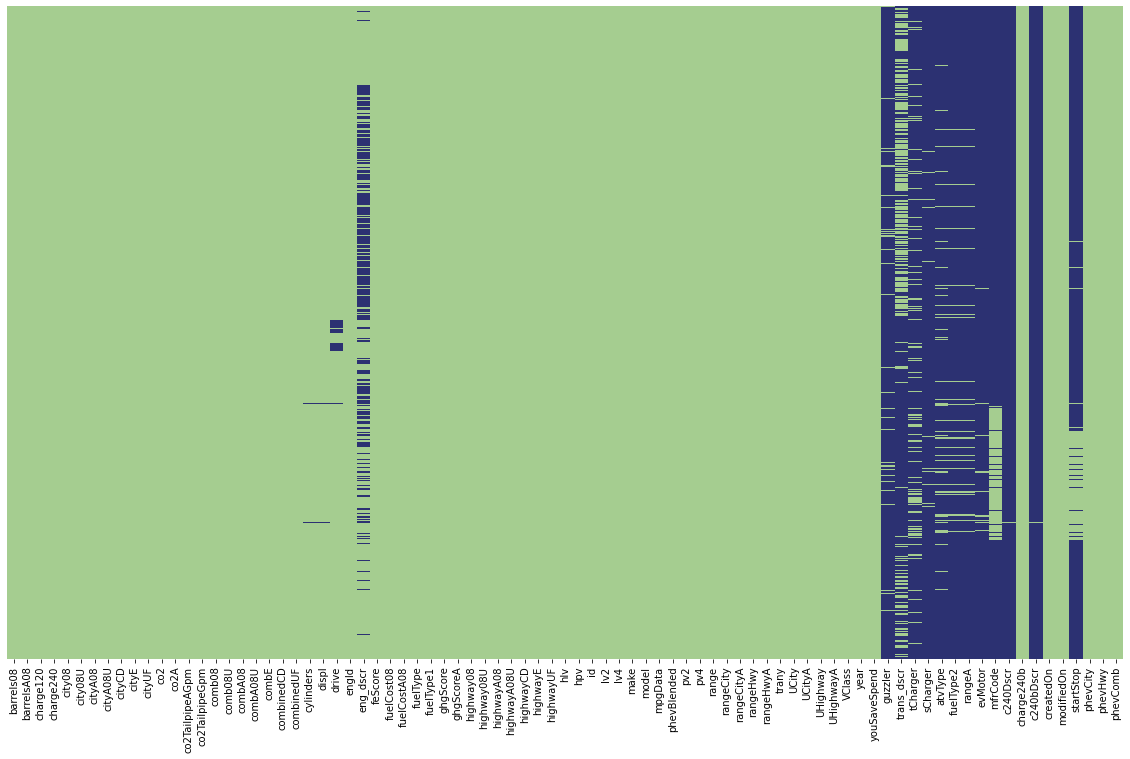

In [25]:
# grafica de nulos en el dataframe

plt.figure(figsize=(20,12))

sns.heatmap(df.isna(),
           yticklabels=False,
           cmap='crest',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

Vamos a encapsular en una función el código anterior por si necesitamos el gráfico más adelante y poder reutilzarlo.

In [26]:
def plt_isna(df:pd.DataFrame, name:str)->None:
    
    '''
        Función que recibe un dataframe como parámetro y devuelve un heatmap con los datos nulos
        de cada una de sus columnas
        
        Parametros.
        -----------
        df = Pandas dataframe
        
        Return.
        -----------
        
        La función muestra por pantalla un heatmap con los datos nulos por cada columna, pero no devuelve nada
    
    '''
    
    plt.figure(figsize=(20,12))

    sns.heatmap(df.isna(),
           yticklabels=False,
           cmap='crest',
           cbar = False)
    plt.savefig(f'{name}.png')
    plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando
    

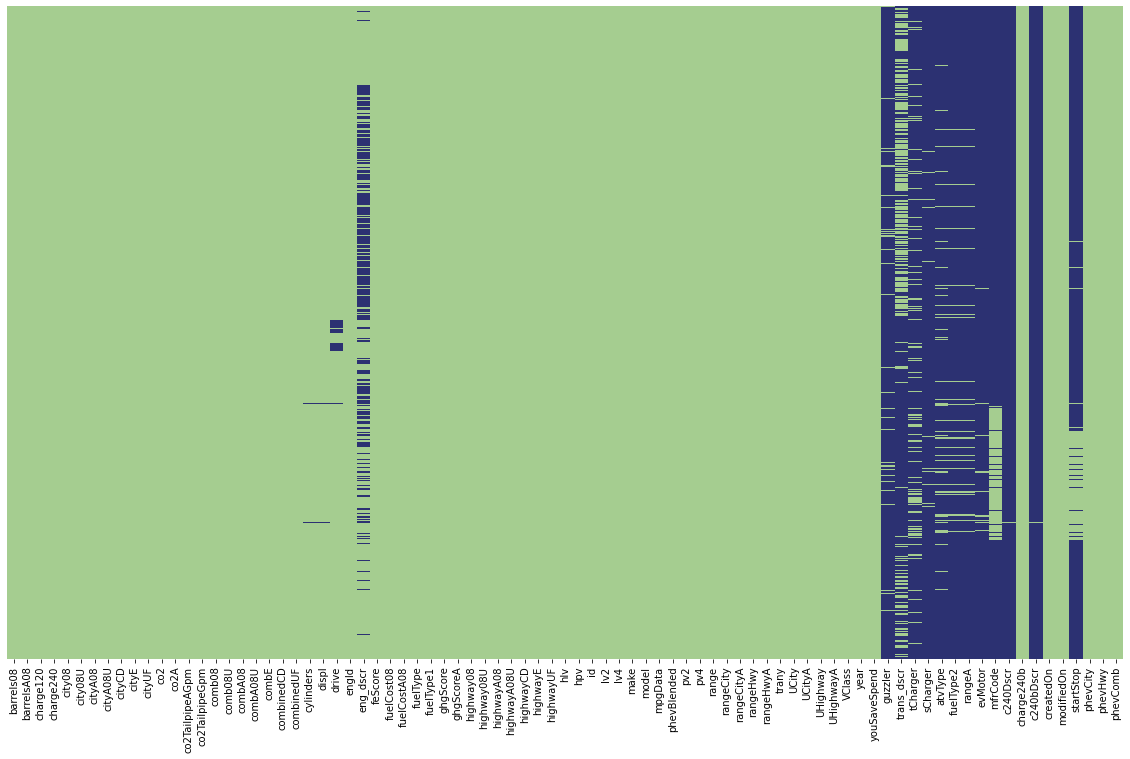

In [27]:
plt_isna(df, 'columnas_nulas_iniciales')

Si una columna tiene muchos valores nulos puede ensuciar nuestro análisis e inducirnos a error por lo que si tiene más del 50-60% de sus valores nulos, un opción bastante viable es eliminarla

**Vamos a borrar las columnas con más de 10000 valores nulos**

In [28]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

**Antes de comenzar la limpieza es bueno realizar una copia de seguridad de nuestros datos originales**

In [29]:
df_original = df.copy()

Una vez hecha la copia de seguridad comenzamos el proceso de limpieza

In [30]:
df.drop(columns=nan_cols[nan_cols>1e4].index, inplace=True)

In [31]:
df.shape, df_original.shape

((37843, 70), (37843, 83))

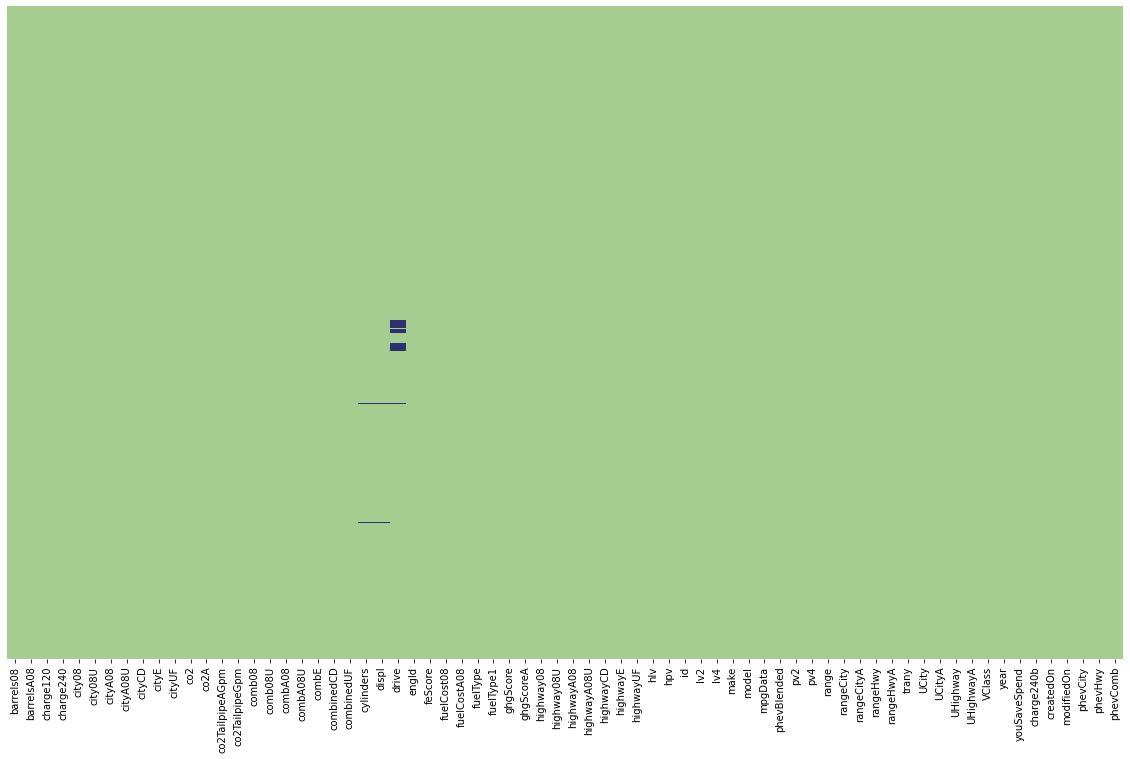

In [33]:
plt_isna(df, 'primera_limpieza')

In [34]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

Una vez eliminadas las columnas con mayor número de nulos vamos a proceder a limpiar las columnas que aún tienen datos nulos

### Columna Cylinders & displ

Lo primero que vamos a hacer será localizar los índices de la columna que tienen valores nulos para ver si podemos sacar alguna conclusión de porque nos falta ese dato y si podemos rellenarlo de alguna manera

In [35]:
bad_index = df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

Una vez que tenemos los índices vamos a filtrar nuestro df por esos índices y seleccionaremos una serie de columnas a ver si nos puede ayudar a entender porque nos falta ese dato.

En nuestro caso vamos a seleccionar las columnas de 'make', 'model', 'fuelType', 'cylinders', 'displ'

In [36]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head()

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,NaN,NaN
7139,Toyota,RAV4 EV,Electricity,NaN,NaN
8143,Toyota,RAV4 EV,Electricity,NaN,NaN
8144,Ford,Th!nk,Electricity,NaN,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN,NaN


En este caso particular parece que la columna fuelType puede ayudarnos a entender el porque la columna cylinders tiene un dato nulo

In [37]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

Como podemos observar todos los coches que tenemos aquí tienen motor eléctrico o 'regular', los coches con motor eléctrico no tienen cilindros por ese motivo nos falta ese dato, vamos a ver si podemos entender que marcas tienen el motor 'regular'

In [38]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']][df.fuelType=='Regular']

,make,model,fuelType,cylinders,displ
21413,Subaru,RX Turbo,Regular,NaN,NaN
21414,Subaru,RX Turbo,Regular,NaN,NaN
21506,Mazda,RX-7,Regular,NaN,1.3


**¿Qué es un motor rotativo?**
[wikipedia](https://es.wikipedia.org/wiki/Motor_rotativo)

Como vemos tanto los motores eléctricos como los rotativos no tienen cilindros, por lo que podemos rellenar nuestros campos con un 0 y de esta manera ya tendríamos esta columna limpia.

Para ello utilizaremos el método de pandas fillna()

In [39]:
df[['cylinders', 'displ']] = df[['cylinders', 'displ']].fillna(0) 

In [40]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head()

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,0.0,0.0
7139,Toyota,RAV4 EV,Electricity,0.0,0.0
8143,Toyota,RAV4 EV,Electricity,0.0,0.0
8144,Ford,Th!nk,Electricity,0.0,0.0
8146,Ford,Explorer USPS Electric,Electricity,0.0,0.0


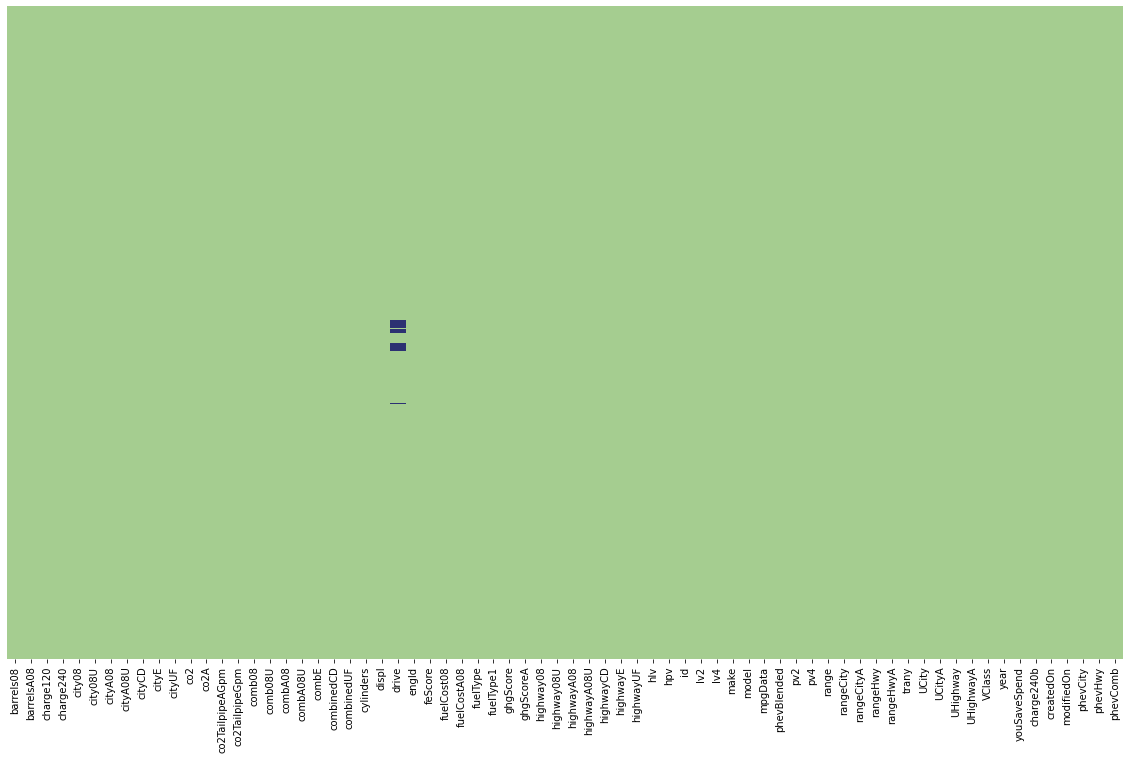

In [41]:
plt_isna(df, 'limpieza_de_cylinders_&_disp')

### Columna drive

In [42]:
bad_index = df.drive[df.drive.isna()].index

bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

Vamos a seguir el mismo procedimiento que con las columnas cilynders y displ

In [43]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head()

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN


In [44]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

Para ayudarnos a decidir vamos a ver que tipos drive tenemos en nuestro dataframe

In [45]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

En este caso y como el volumen de datos incompletos es alto en vez de borrarlos vamos a proceder a rellenar los datos con 'unknown' y de esta manera evitamos perder casi 1200 registros.

In [46]:
df.drive.fillna('unknown', inplace=True)

In [47]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

trany    11
dtype: int64

### Columna trany

In [48]:
bad_index = df.trany[df.trany.isna()].index

df.iloc[bad_index][['make', 'model', 'fuelType', 'trany']].head()

,make,model,fuelType,trany
7138,Nissan,Altra EV,Electricity,NaN
7139,Toyota,RAV4 EV,Electricity,NaN
8143,Toyota,RAV4 EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN


In [49]:
df.trany.unique()

array(['Manual 5-spd', 'Automatic 3-spd', 'Automatic 4-spd',
       'Automatic 5-spd', 'Manual 4-spd', 'Manual 3-spd', 'Manual 6-spd',
       'Automatic (S5)', 'Automatic (variable gear ratios)',
       'Automatic 6-spd', 'Automatic (S6)', nan, 'Automatic (S4)',
       'Automatic 7-spd', 'Automatic (S7)', 'Automatic (S8)',
       'Automatic (AM5)', 'Auto(AM6)', 'Auto(AV-S7)', 'Automatic (A6)',
       'Automatic (AV-S6)', 'Auto(AM7)', 'Manual 4-spd Doubled',
       'Manual 5 spd', 'Automatic (AM6)', 'Manual 7-spd', 'Auto(L4)',
       'Auto(L3)', 'Automatic (AV)', 'Auto (AV-S6)', 'Auto(AM5)',
       'Auto(AV-S6)', 'Auto (AV-S8)', 'Automatic 8-spd', 'Auto(AV-S8)',
       'Automatic (A1)', 'Auto (AV)', 'Auto(AM-S6)', 'Auto(AM-S7)',
       'Automatic 6spd', 'Automatic 9-spd', 'Automatic (S9)',
       'Auto(AM-S8)', 'Auto(A1)', 'Auto(AM8)', 'Manual(M7)',
       'Auto(AM-S9)'], dtype=object)

In [50]:
df.trany.fillna('unknown', inplace=True)

In [51]:
nan_cols = df.isna().sum()

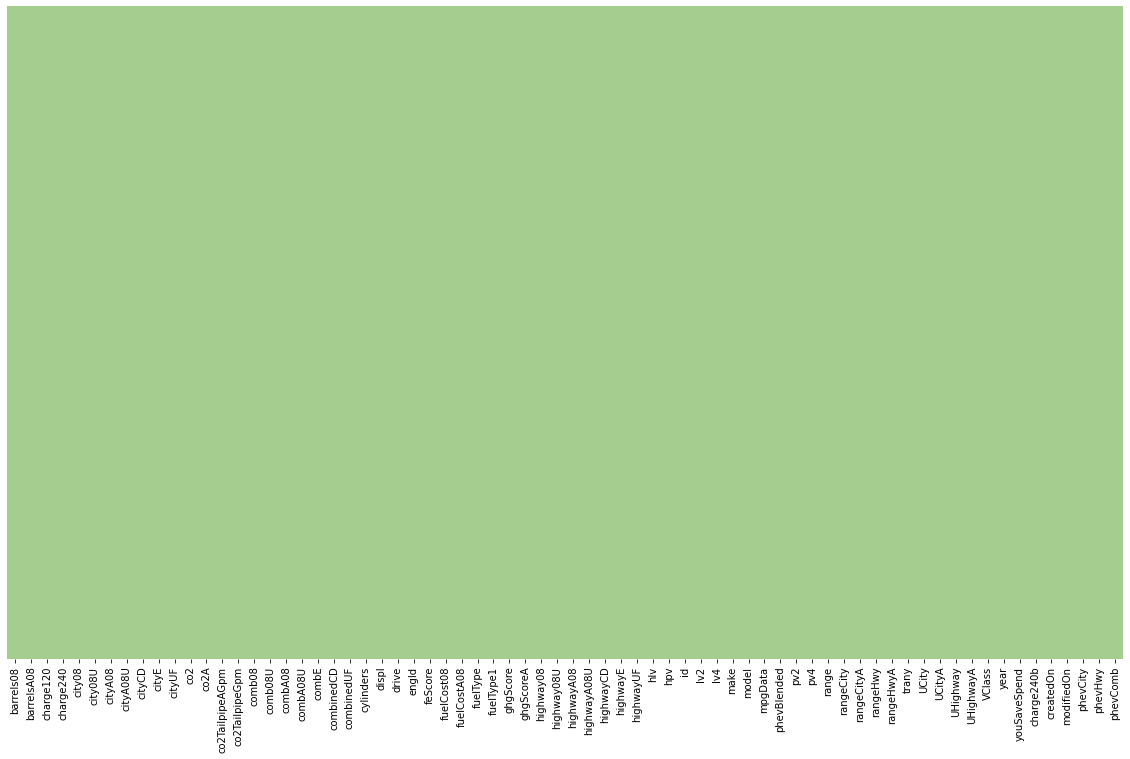

In [52]:
plt_isna(df, 'data_frame_limpio_final')

**Ahora vamos a proceder a la eliminación de datos duplicados**

Para ello tenemos el método de pandas drop_duplicates()

Antes de proceder a eliminarlos comprobaremos si realmente hay duplicados o no.

In [53]:
df.drop_duplicates().shape, df.shape

((37843, 70), (37843, 70))

En principio no parece que tengamos datos duplicados

### Columnas constantes o con baja varianza

Primero nos fijaremos en las columnas numéricas, porque hacemos un estudio de esto, una columna constante o con una varianza baja no nos aporta valor a nuestro análisis y puede introducirnos ruido en nuestro posterior modelo, por lo que este tipo de columnas suelen eliminarse de los análisis.

In [54]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0: #si la desviación standar de una columna es 0 significa que su valor es cte
        cte_cols.append(c)
        
cte_cols

['charge120']

In [55]:
df.charge120.value_counts()

0.0    37843
Name: charge120, dtype: int64

In [56]:
df.drop(cte_cols, axis=1, inplace=True)

In [57]:
cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

In [58]:
cte_str_cols = []

for c in df.select_dtypes(include='object'): # para columnas de tipo No numérico
    
    if len(df[c].unique())==1: #si la columna categorica solo tiene un valor no indica que esta es cte
        cte_str_cols.append(c)
        
cte_str_cols

[]

In [59]:
df.shape, df_original.shape

((37843, 69), (37843, 83))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

In [60]:
#stats

stats = df.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
youSaveSpend,37843.0,-2658.999022,2553.098329,-22250.0,-4250.0,-2500.0,-750.0,4000.0,3500.0
charge240b,37843.0,0.004360,0.142776,0.0,0.0,0.0,0.0,7.0,0.0
phevCity,37843.0,0.069313,1.966806,0.0,0.0,0.0,0.0,97.0,0.0
phevHwy,37843.0,0.068203,1.871986,0.0,0.0,0.0,0.0,79.0,0.0
phevComb,37843.0,0.068573,1.913647,0.0,0.0,0.0,0.0,88.0,0.0


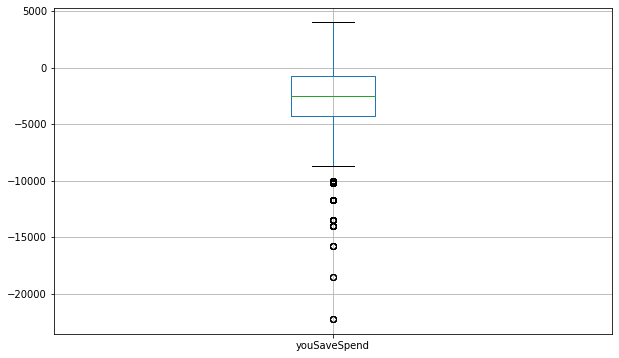

In [61]:
df[['youSaveSpend']].boxplot(figsize=(10,6));

Vamos a generar una función que nos calcule el índice IQR de cada una de nuestras

In [62]:
def get_outliers(stats:pd.DataFrame, threshold: float = 1.5)-> pd.DataFrame:
    '''
        Esta función recibe un dataframe del tipo df.describe().T
        
        Nos devuelver un dataframe con los outliers
        
        Params:
            stats = pd.DataFrame.describe().T
            threshold = float, con el umbral de tukey
        
        Return:
            pd.DataFrame
    
    '''
    
    stats['IQR'] = stats['75%']-stats['25%']
    
    outliers = pd.DataFrame(columns=stats.index)
    
    for c in stats.index:
        iqr = stats.at[c, 'IQR']
        
        cut_off = threshold * iqr 
        
        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off
        
        res = df[(df[c] < lower) | (df[c] > upper)].copy()
        
        res['outliers'] = c
        
        outliers = outliers.append(res, sort=True)
    
    print(outliers['outliers'].value_counts())
    return outliers

In [63]:
outliers = get_outliers(df.describe().T)

highway08U         7299
city08U            7299
comb08U            7299
engId              6677
lv2                6250
pv2                6239
co2                5854
ghgScore           5815
feScore            5815
hlv                4615
hpv                4614
city08             1470
UCity              1440
highwayA08         1408
cityA08            1408
barrelsA08         1408
combA08            1408
fuelCostA08        1372
UCityA             1362
UHighwayA          1362
lv4                1357
co2TailpipeAGpm    1353
highway08           996
comb08              969
UHighway            893
cylinders           853
co2TailpipeGpm      830
highwayA08U         740
cityA08U            740
combA08U            740
youSaveSpend        604
fuelCost08          604
co2A                525
ghgScoreA           518
barrels08           432
combE               175
cityE               175
highwayE            175
charge240           152
range               120
rangeCity            93
rangeHwy        

In [64]:
outliers.head()

,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge240,charge240b,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,createdOn,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,modifiedOn,mpgData,outliers,phevBlended,phevCity,phevComb,phevHwy,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,year,youSaveSpend
47,11.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1004,0,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
58,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2854,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1005,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
69,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2850,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1006,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
80,11.0,0.0,14.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,10,0.0,0,0.0,0.0,0.0,0.0,0,0,1007,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
275,11.0,0.0,16.0,0.0,Standard Pickup Trucks,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,7.4,Rear-Wheel Drive,4880,-1,3350,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,10245,0,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 4-spd,1993,-10000


Ahora vamos extraer los índices de este df en una lista para filtrar nuestro df y de esta manera quitar los datos atípicos de nuestro df.

**¡¡¡OJO!!!!** Solo se quitan outliers una sola vez, ya que siempre habrá datos que superen los límites de "normalidad" y corremos el riesgo de quedarnos sin datos.

In [65]:
clean_index = [i for i in df.index if i not in outliers.index]

In [66]:
clean_index[:10]

[0, 14, 25, 33, 34, 36, 41, 48, 49, 50]

In [67]:
df = df.iloc[clean_index]

<AxesSubplot:>

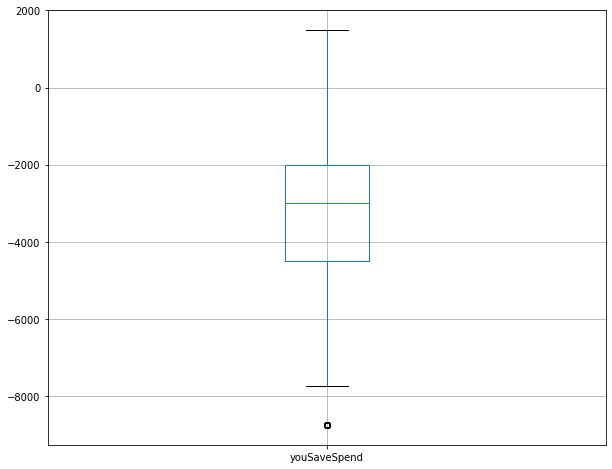

In [68]:
df[['youSaveSpend']].boxplot(figsize=(10,8))

In [69]:
df.shape, df_original.shape

((15824, 69), (37843, 83))

### Colinealidad

    A grosso modo podemos decir que existe colinealidad entre dos columnas cuando ambas nos están aportando la misma información, bien porque sean la misma o porque una es combinación lineal de la otra
    
    Para estudiar la colinealidad lo haremos a través de la matriz de correlación, si en esta encontramos valores nulos signifacará que la varianza entre ambas columnas es 0.
    



$$\rho(X,Y)=\frac{\sigma{X,Y}}{\sigma{X}\sigma{Y}} =\frac{Cov(X,Y)}{\sqrt{ Var{(X)} Var{(Y)}}}$$



$$\rho{(X,Y)}$$ es la correlación de pearson

$$\sigma{(X,Y)}$$ es la covarianza de (X,Y)

$$\sigma{(X)}$$ es la desviación estándar de (X)

$$\sigma{(Y)}$$ es la desviación estándar de (Y)

In [70]:
df.corr().head()

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
barrels08,1.00000,NaN,NaN,-0.93583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999924,-0.96505,NaN,NaN,NaN,NaN,NaN,NaN,0.752395,0.811233,0.334073,NaN,0.906513,NaN,NaN,NaN,-0.946328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.276821,NaN,-0.494419,NaN,NaN,-0.507888,NaN,NaN,NaN,NaN,NaN,-0.936067,NaN,-0.946844,NaN,-0.337044,-0.906513,NaN,NaN,NaN,NaN
barrelsA08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charge240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city08,-0.93583,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.937518,0.97847,NaN,NaN,NaN,NaN,NaN,NaN,-0.762075,-0.773238,-0.248624,NaN,-0.896825,NaN,NaN,NaN,0.913937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217218,NaN,0.435087,NaN,NaN,0.438249,NaN,NaN,NaN,NaN,NaN,0.995095,NaN,0.915614,NaN,0.245314,0.896825,NaN,NaN,NaN,NaN
city08U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,15824.0,19.073752,3.676175,10.632581,16.4805,18.311667,21.974000,27.467500
barrelsA08,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
charge240,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
city08,15824.0,15.960756,3.117783,10.000000,14.0000,15.000000,18.000000,27.000000
city08U,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cityA08,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cityA08U,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cityCD,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cityE,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
cityUF,15824.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000


In [72]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number):
    
    if df[c].std()==0:
        cte_cols.append(c)

cte_cols

['barrelsA08',
 'charge240',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'feScore',
 'fuelCostA08',
 'ghgScore',
 'ghgScoreA',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'lv2',
 'pv2',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

Este resultado se debe al que al eliminar los outliers la desviación estándar de nuestras columnas ha variado con el resultado mostrado arriba, haciendo que ahora estas columnas tengan una varianza de 0 y por lo tanto podemos tratarlas como columnas constantes.
Como hemos dicho antes todas estas columnas no nos aportan valor a nuestro análisis y vamos a eliminarlas

In [73]:
df = df.drop(columns=cte_cols, axis=1)

In [75]:
df.corr().head()

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,phevBlended,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.935830,0.999924,-0.965050,0.752395,0.811233,0.334073,0.906513,-0.946328,-0.276821,-0.494419,NaN,-0.507888,-0.936067,-0.946844,-0.337044,-0.906513
city08,-0.935830,1.000000,-0.937518,0.978470,-0.762075,-0.773238,-0.248624,-0.896825,0.913937,0.217218,0.435087,NaN,0.438249,0.995095,0.915614,0.245314,0.896825
co2TailpipeGpm,0.999924,-0.937518,1.000000,-0.966465,0.751088,0.808601,0.331573,0.907603,-0.947356,-0.275843,-0.494017,NaN,-0.507476,-0.937709,-0.947834,-0.335116,-0.907603
comb08,-0.965050,0.978470,-0.966465,1.000000,-0.734731,-0.770555,-0.283574,-0.899144,0.966828,0.248932,0.503415,NaN,0.512015,0.982336,0.968445,0.292878,0.899144
cylinders,0.752395,-0.762075,0.751088,-0.734731,1.000000,0.893697,0.202551,0.743328,-0.659147,-0.118147,-0.215063,NaN,-0.203682,-0.761856,-0.659978,-0.126770,-0.743328


Vemos que al volver a calcular la matriz de correlación nos aparece columna con Nulos que no estaba en la lista anterior, siguiendo el mismo procediento vamos a eliminarla

In [76]:
df = df.drop('phevBlended', axis=1)

In [77]:
df.corr()

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.935830,0.999924,-0.965050,0.752395,0.811233,0.334073,0.906513,-0.946328,-0.276821,-0.494419,-0.507888,-0.936067,-0.946844,-0.337044,-0.906513
city08,-0.935830,1.000000,-0.937518,0.978470,-0.762075,-0.773238,-0.248624,-0.896825,0.913937,0.217218,0.435087,0.438249,0.995095,0.915614,0.245314,0.896825
co2TailpipeGpm,0.999924,-0.937518,1.000000,-0.966465,0.751088,0.808601,0.331573,0.907603,-0.947356,-0.275843,-0.494017,-0.507476,-0.937709,-0.947834,-0.335116,-0.907603
comb08,-0.965050,0.978470,-0.966465,1.000000,-0.734731,-0.770555,-0.283574,-0.899144,0.966828,0.248932,0.503415,0.512015,0.982336,0.968445,0.292878,0.899144
cylinders,0.752395,-0.762075,0.751088,-0.734731,1.000000,0.893697,0.202551,0.743328,-0.659147,-0.118147,-0.215063,-0.203682,-0.761856,-0.659978,-0.126770,-0.743328
displ,0.811233,-0.773238,0.808601,-0.770555,0.893697,1.000000,0.318377,0.731635,-0.725555,-0.184449,-0.344986,-0.346170,-0.774059,-0.727275,-0.214355,-0.731635
engId,0.334073,-0.248624,0.331573,-0.283574,0.202551,0.318377,1.000000,0.191826,-0.308908,-0.665605,-0.207687,-0.236535,-0.251088,-0.311117,-0.808514,-0.191826
fuelCost08,0.906513,-0.896825,0.907603,-0.899144,0.743328,0.731635,0.191826,1.000000,-0.847817,-0.158090,-0.357152,-0.348663,-0.896268,-0.847984,-0.184535,-1.000000
highway08,-0.946328,0.913937,-0.947356,0.966828,-0.659147,-0.725555,-0.308908,-0.847817,1.000000,0.278366,0.575191,0.592717,0.917533,0.997583,0.343064,0.847817
id,-0.276821,0.217218,-0.275843,0.248932,-0.118147,-0.184449,-0.665605,-0.158090,0.278366,1.000000,0.121284,0.144848,0.219417,0.278024,0.733531,0.158090


In [78]:
df._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15824 entries, 0 to 37837
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   barrels08       15824 non-null  float64
 1   city08          15824 non-null  int64  
 2   co2TailpipeGpm  15824 non-null  float64
 3   comb08          15824 non-null  int64  
 4   cylinders       15824 non-null  float64
 5   displ           15824 non-null  float64
 6   engId           15824 non-null  int64  
 7   fuelCost08      15824 non-null  int64  
 8   highway08       15824 non-null  int64  
 9   id              15824 non-null  int64  
 10  lv4             15824 non-null  int64  
 11  pv4             15824 non-null  int64  
 12  UCity           15824 non-null  float64
 13  UHighway        15824 non-null  float64
 14  year            15824 non-null  int64  
 15  youSaveSpend    15824 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2.1 MB


In [79]:
# criterio de colianelidad

colineales = []

for c in df._get_numeric_data(): # para cada columna numerica ...
    
    for i in range(len(df.corr())): # vamos a recorrer la matriz de correlación ..
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1: 
            # el umbral es arbitrario, abs es el valor absoluto del dato
            #print('columna que estay explorando ', c)
            
            #print('valor de la matriz de correlación ', df.corr()[c][i] )
            colineales.append(c)

colineales = list(set(colineales))

len(colineales)

11

In [80]:
colineales

['city08',
 'comb08',
 'youSaveSpend',
 'pv4',
 'co2TailpipeGpm',
 'fuelCost08',
 'UCity',
 'highway08',
 'UHighway',
 'barrels08',
 'lv4']

Al igual que pasa con las columnas constantes, la colinealidad nos dice que estas columnas aportan el mismo dato respecto a la que la hemos comparado, por lo que podemos eliminar dicha columna

In [81]:
df = df.drop(columns=colineales, axis=1)

In [82]:
df.shape, df_original.shape

((15824, 15), (37843, 83))

### Normalización columna trany

In [83]:
df.trany.unique()

array(['Manual 5-spd', 'Automatic 3-spd', 'Manual 4-spd',
       'Automatic 4-spd', 'Manual 3-spd', 'Manual 6-spd',
       'Automatic 5-spd', 'Automatic (S4)', 'Automatic (S5)',
       'Automatic (variable gear ratios)', 'Automatic 6-spd',
       'Automatic (S6)', 'Automatic 7-spd', 'Automatic (S7)',
       'Automatic (S8)', 'unknown', 'Automatic (AM6)', 'Auto(AM6)',
       'Automatic (AV-S6)', 'Auto(L4)', 'Auto(L3)', 'Automatic (AV)',
       'Auto (AV-S6)', 'Auto(AV-S6)', 'Auto (AV-S8)', 'Automatic 8-spd',
       'Auto(AM7)'], dtype=object)

Vamos utilizar el método apply de pandas para aplicar una función a la columna trany en la que nos cambie el valor por 'MANUAL' si el dato que recibe la función contiene la substring 'Man', 'AUTO' si el dato que recibe contiene la substring 'Au' o que deje el dato tal cual está si no contiene ninguno

In [84]:
df.trany = df.trany.apply(lambda x: 'MANUAL' if 'Man' in x else ('AUTO' if 'Au' in x else x))

In [85]:
df.trany.value_counts()

AUTO       10857
MANUAL      4966
unknown        1
Name: trany, dtype: int64

Como solo tenemos un dato 'unknown' vamos a eliminarlo

In [86]:
df[df.trany=='unknown']

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
19128,6.0,4.1,2-Wheel Drive,4852,Regular,Regular Gasoline,27381,GMC,C25 Pickup 2WD,N,unknown,Standard Pickup Trucks 2WD,1984,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [87]:
df.drop(df[df.trany=='unknown'].index, axis=0, inplace=True)

In [88]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


## Dataframe Final

    Para finalizar vamos a resetear los índices de nuestro df para que todo quede en orden

In [90]:
df.reset_index(drop=True).head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
1,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
2,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
3,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
4,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [91]:
df = df.reset_index(drop=True)

In [92]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
1,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
2,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
3,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
4,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [93]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15823 entries, 0 to 15822
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cylinders   15823 non-null  float64
 1   displ       15823 non-null  float64
 2   drive       15823 non-null  object 
 3   engId       15823 non-null  int64  
 4   fuelType    15823 non-null  object 
 5   fuelType1   15823 non-null  object 
 6   id          15823 non-null  int64  
 7   make        15823 non-null  object 
 8   model       15823 non-null  object 
 9   mpgData     15823 non-null  object 
 10  trany       15823 non-null  object 
 11  VClass      15823 non-null  object 
 12  year        15823 non-null  int64  
 13  createdOn   15823 non-null  object 
 14  modifiedOn  15823 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 11.3 MB


Nuestro dataset ocupa ahora 11,3 MB, pero vamos a ver si podemos cambiar el tipo de dato para ocupe lo menos posible y de esta forma podamos bajar el coste computacional si quisieramos usarlo para entrenar modelos de Machine Learning

In [94]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [95]:
from tqdm.notebook import tqdm

In [96]:
for d in tqdm(['object', 'integer', 'float']):
    for c in tqdm(df.select_dtypes(d).columns):
        if d == 'object':
            df[c]=df[c].astype('category')
        elif d == 'integer':
            df[c] = pd.to_numeric(df[c], downcast='integer')
        elif d == 'float':
            df[c] = pd.to_numeric(df[c], downcast='float')
        else:
            pass

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [97]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15823 entries, 0 to 15822
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cylinders   15823 non-null  float32 
 1   displ       15823 non-null  float32 
 2   drive       15823 non-null  category
 3   engId       15823 non-null  int16   
 4   fuelType    15823 non-null  category
 5   fuelType1   15823 non-null  category
 6   id          15823 non-null  int32   
 7   make        15823 non-null  category
 8   model       15823 non-null  category
 9   mpgData     15823 non-null  category
 10  trany       15823 non-null  category
 11  VClass      15823 non-null  category
 12  year        15823 non-null  int16   
 13  createdOn   15823 non-null  category
 14  modifiedOn  15823 non-null  category
dtypes: category(10), float32(2), int16(2), int32(1)
memory usage: 603.2 KB


Con esto hemos pasado de 11,3MB a 603,2 KB lo que haría que si usaramos este dataset para entrenar un modelo trabajar de forma mas eficiente

### Para finalizar guardamos nuestro df limpio

In [98]:
df.to_csv('Vehicles_messy_clean.csv', index=False)

In [99]:
df_clean = pd.read_csv('Vehicles_messy_clean.csv')

df_clean

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
1,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
2,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
3,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
4,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15818,8.0,5.2,Rear-Wheel Drive,2854,Regular,Regular Gasoline,999,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
15819,4.0,1.9,Front-Wheel Drive,4107,Regular,Regular Gasoline,9991,Saturn,SL,Y,AUTO,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
15820,4.0,1.9,Front-Wheel Drive,4104,Regular,Regular Gasoline,9992,Saturn,SL,Y,AUTO,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
15821,4.0,1.9,Front-Wheel Drive,4107,Regular,Regular Gasoline,9993,Saturn,SL,Y,MANUAL,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
